In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Load the data
data = pd.read_csv("/content/Student_Performance.csv")

# View the first few rows of the data
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
data.shape

(10000, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


EDA

In [9]:
print(data.isna().sum())

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64


In [10]:
# print the null count for all the data
print(data.isna().sum().sum())

0


In [11]:
# describe the data
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [13]:
# describe the categorical features
data['Extracurricular Activities'].describe()

,Extracurricular Activities
count,10000
unique,2
top,No
freq,5052


<Axes: xlabel='Extracurricular Activities', ylabel='Count'>

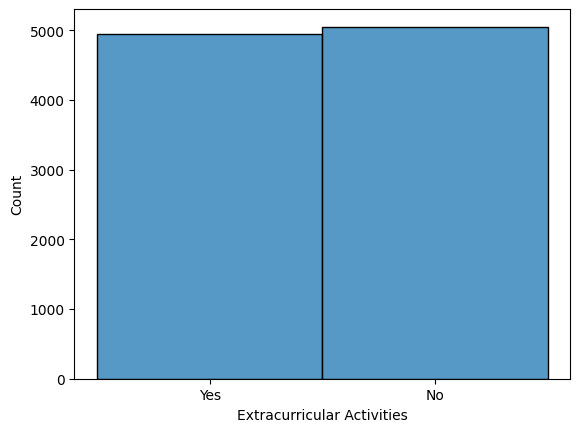

In [15]:
# Plot a histogram for the categorical features
sns.histplot(data['Extracurricular Activities'])

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [18]:
data['Extracurricular Activities'].unique()


array(['Yes', 'No'], dtype=object)

In [19]:
data["Extracurricular Activities"] = data["Extracurricular Activities"].map({"Yes": 1, "No": 0})


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  int64  
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 468.9 KB


In [22]:
data.corr()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888,0.915189
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103,0.024525
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.024525,0.048106,0.043268,1.000000


MODEL TRAINING


In [27]:
# Select the features and put them in X
X = data[['Hours Studied', 'Previous Scores', 'Sleep Hours']]

# Select the target variable and put it in y
y = data['Performance Index']

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [38]:
X_test.shape

(2000, 3)

In [29]:
# Print the model parameters
print("Intercept (Bias):", model.intercept_)
print("Coefficients (Weights):", model.coef_)

Intercept (Bias): -32.75639950098351
Coefficients (Weights): [2.85591758 1.01737929 0.47339139]


In [30]:
print("R^2 Score (Training Data):", model.score(X_train,y_train)*100)

R^2 Score (Training Data): 98.76229328436249


Testing

In [31]:
# Predict the target variable on the testing data
Predict_y = model.predict(X_test)
print('The first few predictions is ' , Predict_y[:5] , '\n')
print('The first few predictions is ' , y_test[:5] , '\n')

The first few predictions is  [55.50949038 21.64844847 47.5220034  30.89616716 43.04969137] 

The first few predictions is  6252    51.0
4684    20.0
1731    46.0
4742    28.0
4521    41.0
Name: Performance Index, dtype: float64 



Evaluation

In [32]:
print('The Mean Squared Error = ' , mean_squared_error(y_test,Predict_y))

The Mean Squared Error =  4.545107899420574


In [33]:
print('The R^2  = ' , r2_score(y_test,Predict_y)*100 , '%')

The R^2  =  98.77353198949831 %


Inference

In [37]:
# Example new data: [hours studied, previous scores, sleep hours]
new_data = [[9, 45, 9]]  # (5 hours studied, 80 previous scores, 7 sleep hours)

# Predict performance index
predicted_performance = model.predict(new_data)
print(f"Predicted Performance Index: {predicted_performance[0]}")


Predicted Performance Index: 42.98944914675658


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


pickling the model

In [42]:
import pickle

# Save the trained model to a file
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)
